<a href="https://colab.research.google.com/github/ssttv/ml-resources/blob/master/visual_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install ipywidgets
import ipywidgets
from ipywidgets import IntProgress

Selecting previously unselected package libkmod2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libkmod2_24-1ubuntu3.1_amd64.deb ...
Unpacking libkmod2:amd64 (24-1ubuntu3.1) ...
Selecting previously unselected package kmod.
Preparing to unpack .../kmod_24-1ubuntu3.1_amd64.deb ...
Unpacking kmod (24-1ubuntu3.1) ...
Selecting previously unselected package module-init-tools.
Preparing to unpack .../module-init-tools_24-1ubuntu3.1_all.deb ...
Unpacking module-init-tools (24-1ubuntu3.1) ...
Setting up libkmod2:amd64 (24-1ubuntu3.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up kmod (24-1ubuntu3.1) ...
Setting up module-init-tools (24-1ubuntu3.1) ...
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26444 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 21.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('/content/drive/generic_datasets/tele_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

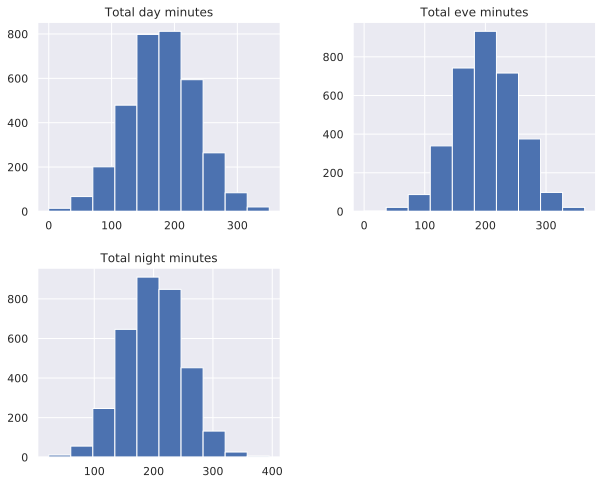

In [3]:
features = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df[features].hist(figsize=(10,8));

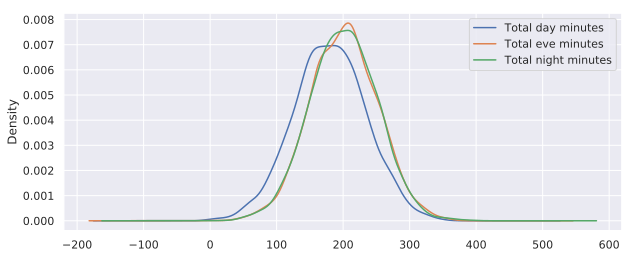

In [4]:
df[features].plot(kind='density', subplots=False, layout=(1,3), sharex=False, figsize=(10,4));

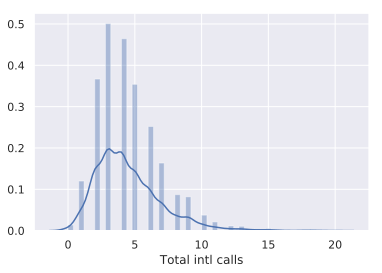

In [5]:
sns.distplot(df['Total intl calls']);

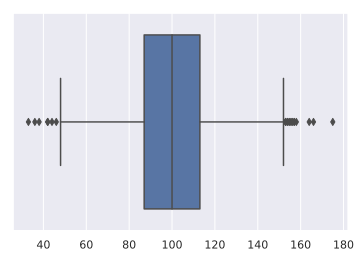

In [6]:
sns.boxplot(x=['Total night calls'], data=df);

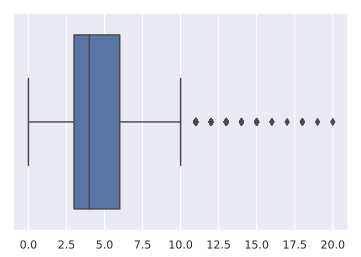

In [7]:
sns.boxplot(x=['Total intl calls'], data=df);

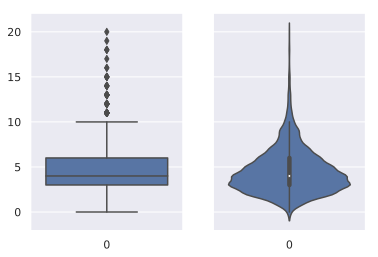

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [9]:
df[features].describe()

Total day minutes  Total eve minutes  Total night minutes
count        3333.000000        3333.000000          3333.000000
mean          179.775098         200.980348           200.872037
std            54.467389          50.713844            50.573847
min             0.000000           0.000000            23.200000
25%           143.700000         166.600000           167.000000
50%           179.400000         201.400000           201.200000
75%           216.400000         235.300000           235.300000
max           350.800000         363.700000           395.000000

In [10]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

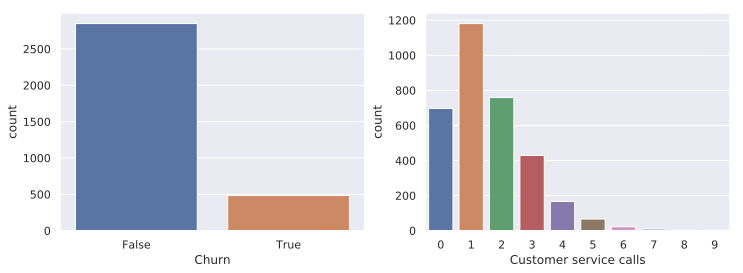

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

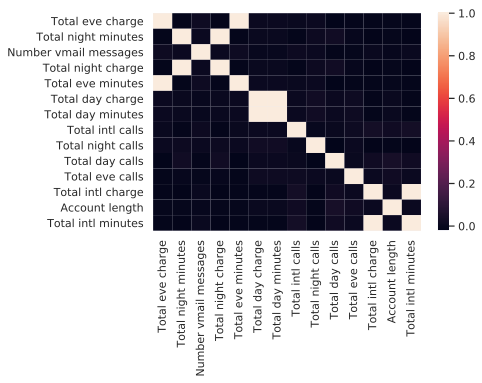

In [12]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [0]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

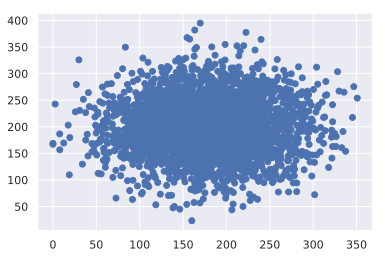

In [14]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

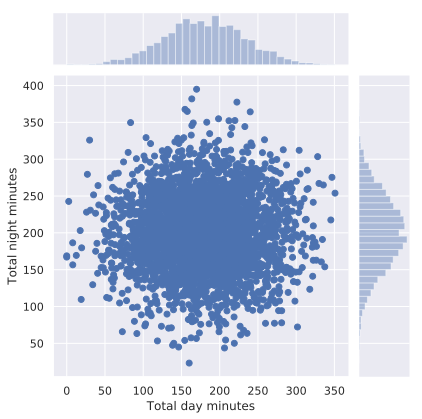

In [15]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

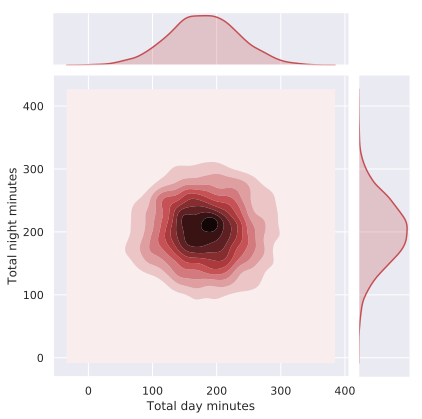

In [16]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="r");

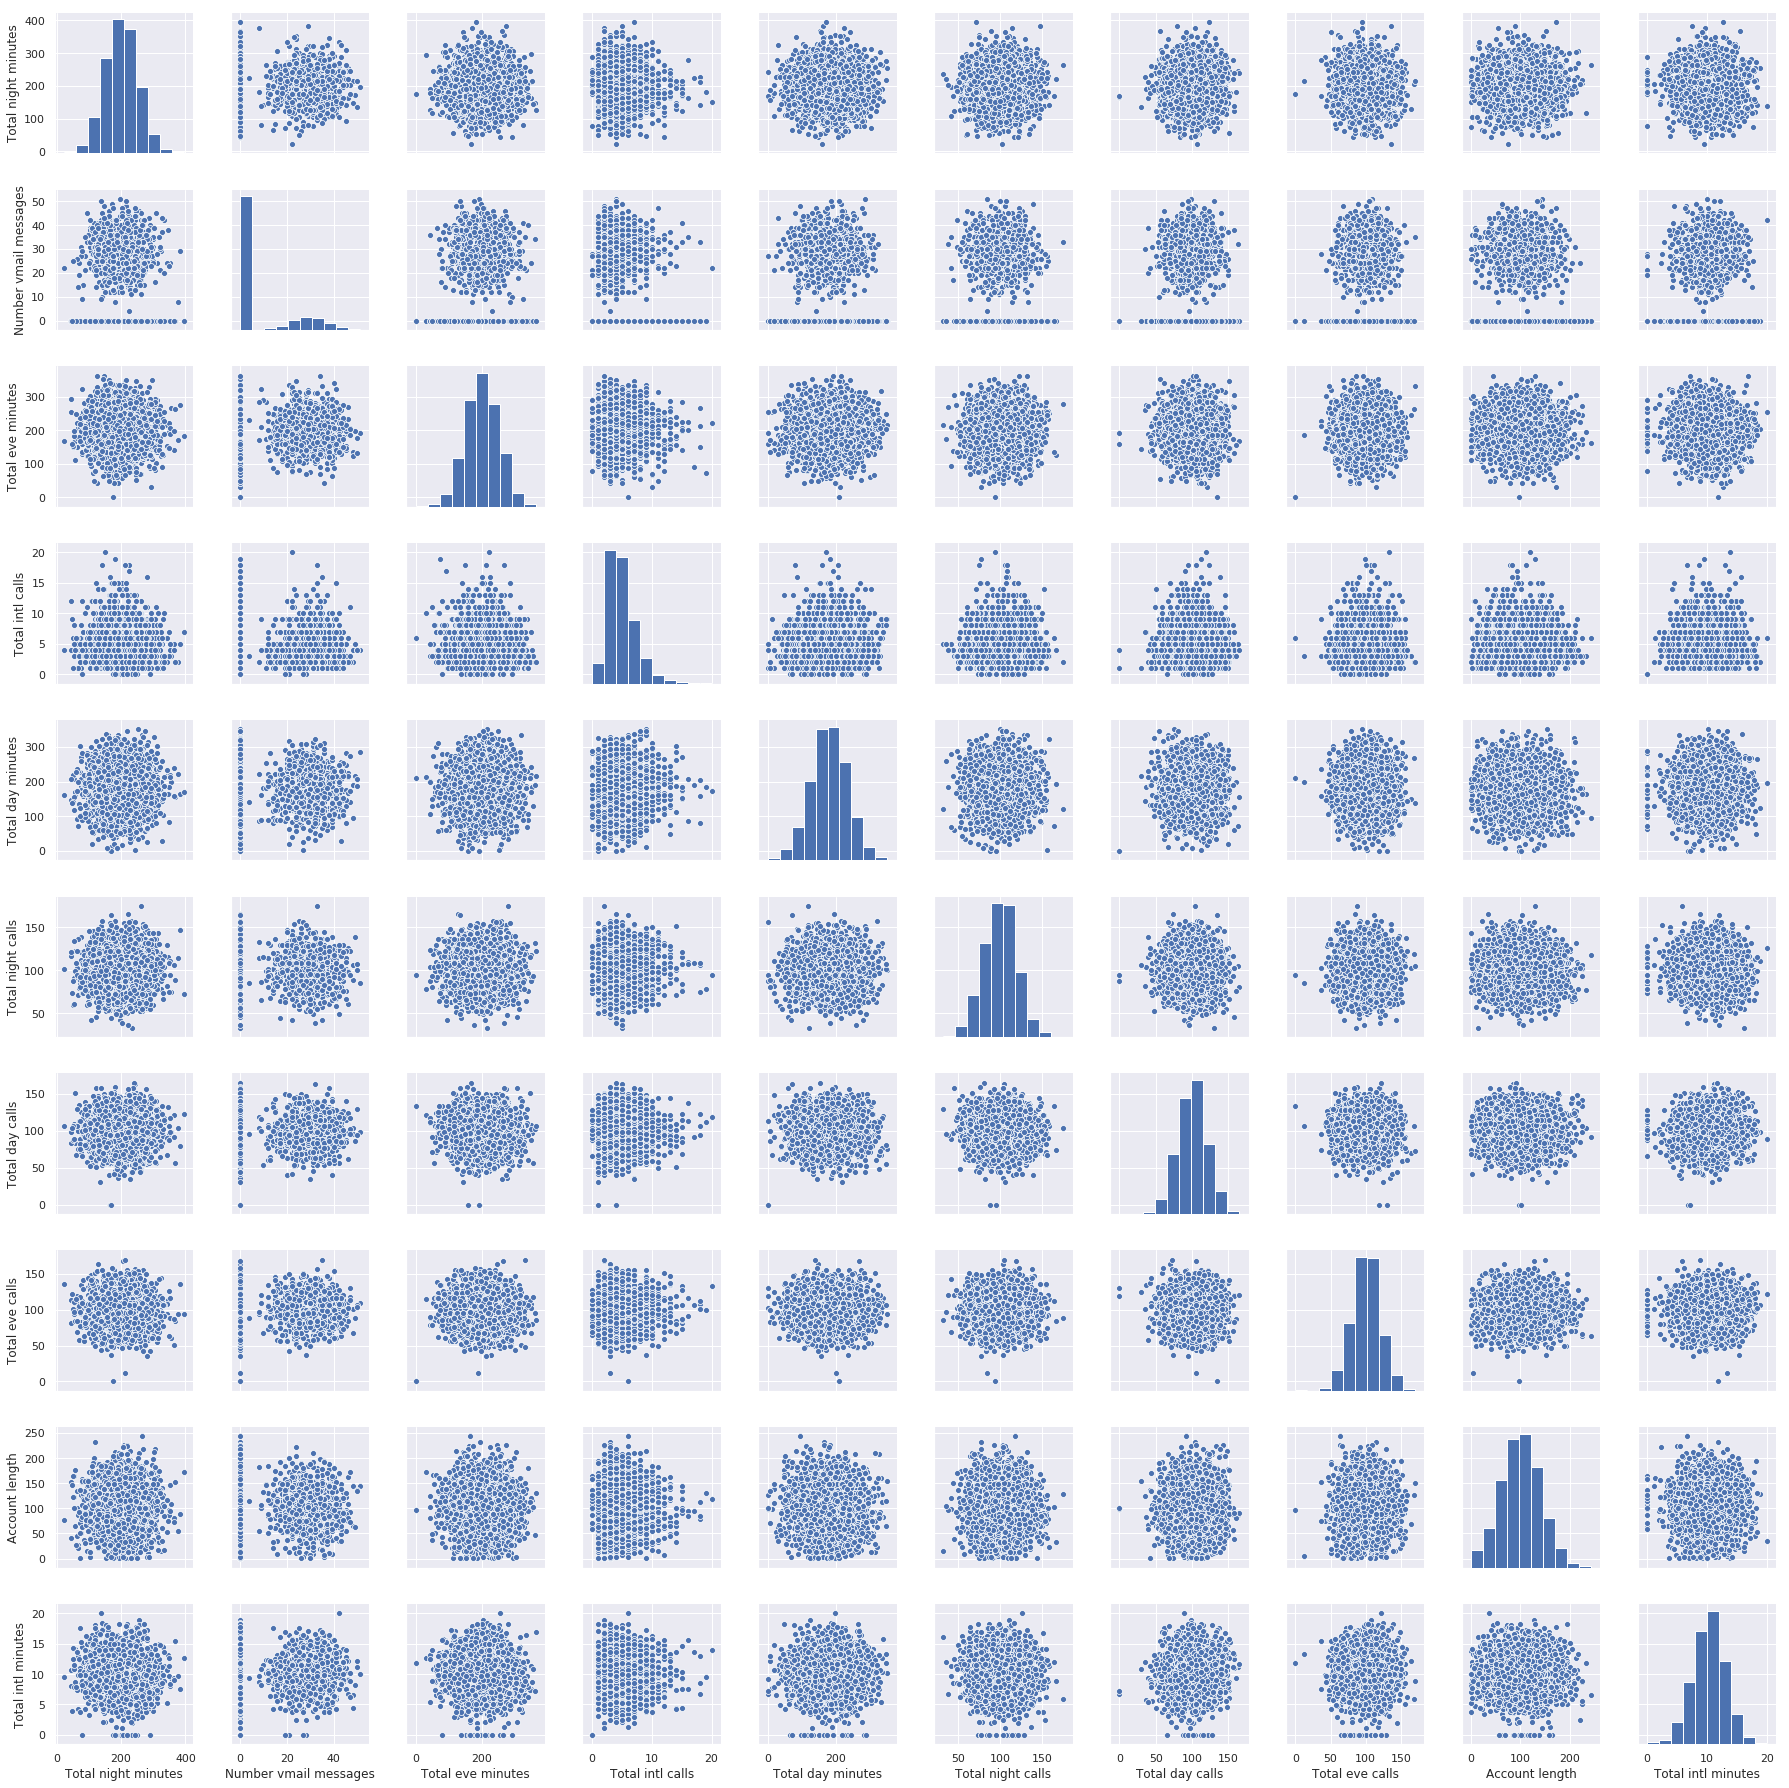

In [17]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [0]:
%config InlineBackend.figure_format = 'svg'


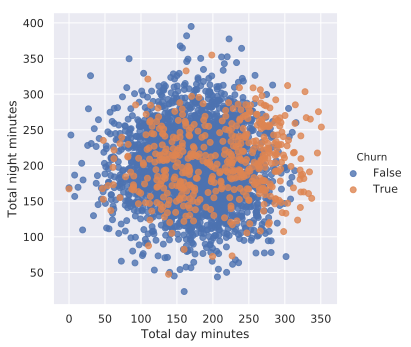

In [19]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

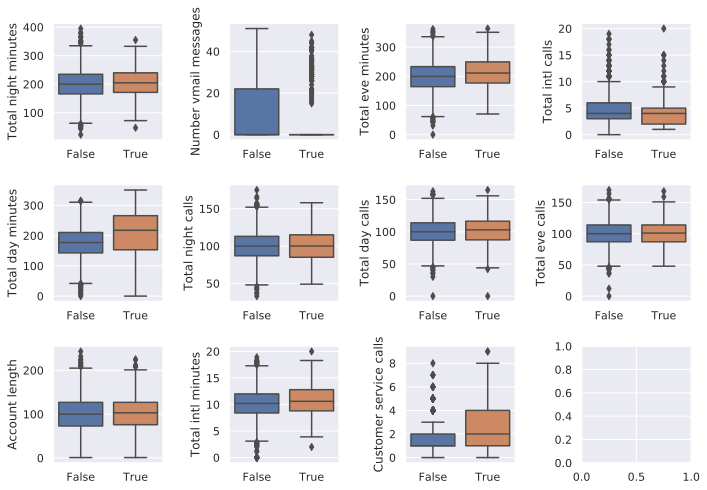

In [20]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

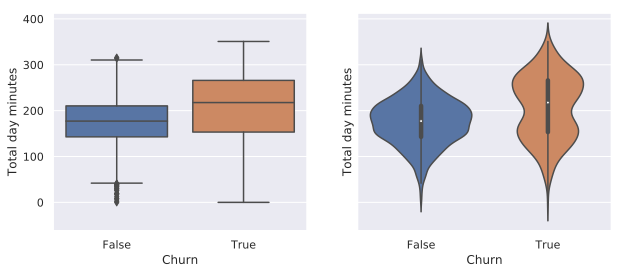

In [21]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

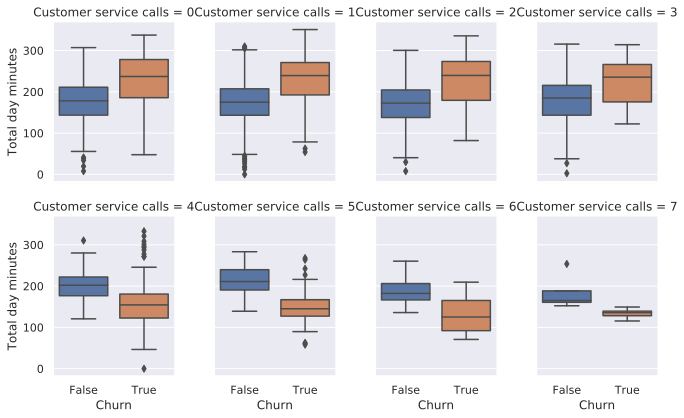

In [26]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

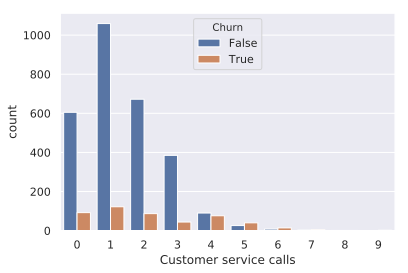

In [27]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

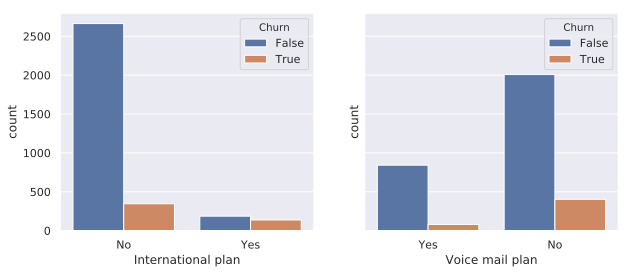

In [28]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [30]:
pd.crosstab(df['State'], df['Churn']).T


State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [31]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [0]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 1min 9s, sys: 13.3 s, total: 1min 22s
Wall time: 1min 22s


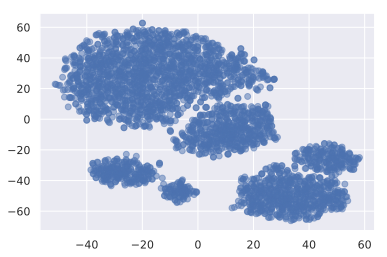

In [36]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);